In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,  KFold
from imblearn.over_sampling import RandomOverSampler 
from sklearn.metrics import classification_report
import catboost as catb

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 14})
TRAIN_PATH = './Data Explorer/train.csv'
TEST_PATH = './Data Explorer/test.csv'
SUBMIT_PATH = './Data Explorer/gender_submission.csv'

## 2. Загрузка данных в Data Frame
#### Описание файлов
- train.csv - тренировочные данные
- test.csv - тестовые данные
- gender_submission.csv - образец файла для отправки в правильном формате
#### Описание признаков данных
- survival: выживший -1 или -0
- pclass: Класс билетов 1 = 1st, 2 = 2nd, 3 = 3rd
- sex: Пол
- Age: Возраст в годах
- sibsp: братьев и сестер/супругов на борту "Титаника"
- parch: родителей/детей на борту "Титаника"
- ticket: Номер билета
- fare: Пассажирский тариф
- cabin: Номер каюты
- embarked: Порт отправления C = Шербур, Q = Квинстаун, S = Саутгемптон


In [2]:
# Импортируем данные train.csv в pandas Dataframe
df_train = pd.read_csv(TRAIN_PATH, sep=',')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Рассмотрим поближе каждую характеристику 

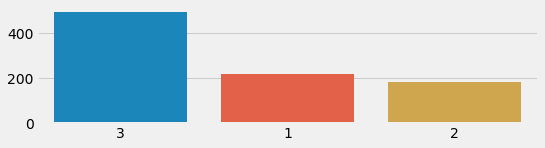


Количество пропущенных элементов 0
3    491
1    216
2    184
Name: Pclass, dtype: int64

Количество уникальных элементов 3


In [4]:
index = 'Pclass'
df_train[index] = df_train[index].astype(str)
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

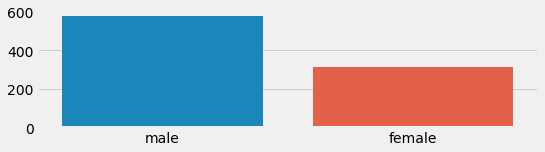


Количество пропущенных элементов 0
male      577
female    314
Name: Sex, dtype: int64

Количество уникальных элементов 2


In [5]:
index = 'Sex'
df_train[index] = df_train[index].astype(str)
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

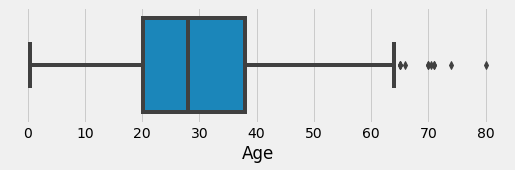


Количество пропущенных элементов 177
Количество уникальных элементов 88
median - 28.000
mean - 29.699
mode - 24.000
квантиль 5% - 4.000
квантиль 98% - 62.740
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64


In [6]:
index = 'Age'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

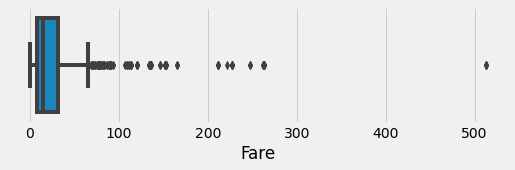


Количество пропущенных элементов 0
Количество уникальных элементов 248
median - 14.454
mean - 32.204
mode - 8.050
квантиль 5% - 7.225
квантиль 98% - 211.338
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64


In [7]:
index = 'Fare'
plt.figure(figsize=(8, 2))
sns.boxplot(df_train[index], whis=1.5)
plt.xlabel(index)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
quantile = df_train.loc[df_train[index].notnull(), index]
print(f'Количество уникальных элементов {quantile.value_counts().size}')
print(f'median - {np.quantile(quantile, q=0.5):.3f}\nmean - {np.mean(quantile):.3f}\nmode - {stats.mode(quantile)[0][0]:.3f}')
print(f'квантиль 5% - {np.quantile(quantile, q=0.05):.3f}\nквантиль 98% - {np.quantile(quantile, q=0.98):.3f}')
print(df_train[index].value_counts().sort_index(ascending=True))

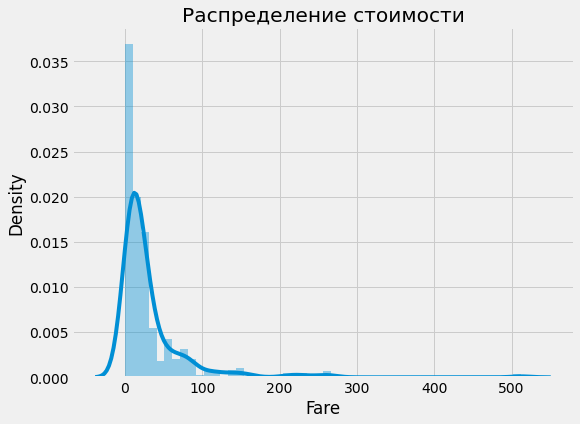

In [8]:
plt.figure(figsize = (8, 6))
sns.distplot(df_train['Fare'])
plt.title('Распределение стоимости')
plt.show()

In [9]:
index = 'Cabin'
df_train[index] = df_train[index].astype(str)

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')


Количество пропущенных элементов 0
nan            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Количество уникальных элементов 148


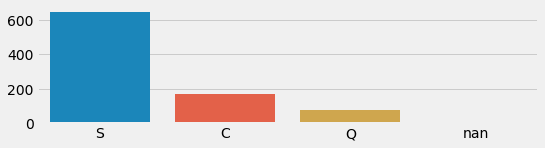


Количество пропущенных элементов 0
S      644
C      168
Q       77
nan      2
Name: Embarked, dtype: int64

Количество уникальных элементов 4


In [10]:
index = 'Embarked'
df_train[index] = df_train[index].astype(str)
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

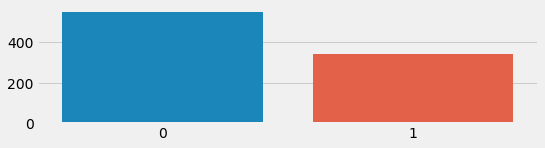


Количество пропущенных элементов 0
0    549
1    342
Name: Survived, dtype: int64

Количество уникальных элементов 2


In [11]:
index = 'Survived'
df_train[index] = df_train[index].astype(str)
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

### *Вывод: имеем не большой дисбаланс классов, в последствии будем проводить балансировку методом Oversampling*

## Обработка данных

In [12]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [13]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    y_test_true = y_test_true['Survived'].to_numpy()
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [14]:
class DataPreprocessing():
    def __init__(self):
        self.medians = None
        self.mode =  None
        self.scaler = RobustScaler()

    def fit(self, df):
        df = df.copy()
        #заполняем переменные класса
        self.medians = df.median()
        self.mode = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mode()

    def transform(self, df):
        df = df.copy()
        #используем метод replace() для замены 1 на 3 и 3 на 1 в столбце 'Pclass'
        df = df.replace({'Pclass':{1:3, 3:1}})
        #используем метод replace() для замены male на 1 и female на 2 в столбце 'Sex'
        df = df.replace({'Sex':{'male':1, 'female':2}})
        # Округляем значения к целому 'Age'
        df['Age'] = np.round_(df['Age'], decimals = 0)
        # Исправим пропуски 'Age'(прировняем их к медиане). 
        df.loc[df['Age'].isnull(), 'Age'] = self.medians[3]
        #используем метод replace() для замены в столбце 'SibSp'
        df = df.replace({'SibSp':{0:8, 1:7, 2:6, 3:5, 5:3, 6:2, 7:1, 8:0}})
        #используем метод replace() для замены в столбце 'Parch'
        df = df.replace({'Parch':{0:6, 1:5, 2:4, 4:2, 5:1, 6:0}})
        # Округляем значения к целому 'Fare'
        df['Fare'] = np.round_(df['Fare'], decimals = 0)
        # удаляем лишнее
        df.drop(['PassengerId','Name','Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
        return df
    
    def fit_scale_merge(self, df):
        #Масштабирование
        df = pd.DataFrame(self.scaler.fit_transform(df), columns=df.columns)
        return df

    def scale_merge(self, df):
        #Масштабирование
        df = pd.DataFrame(self.scaler.transform(df), columns=df.columns)
        return df

In [32]:
class DataPreprocessing():
    def __init__(self):
        self.medians = None
        self.mode =  None
        self.scaler = RobustScaler()

    def fit(self, df):
        df = df.copy()
        #заполняем переменные класса
        self.medians = df.median()
        self.mode = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mode()

    def transform(self, df):
        df = df.copy()
        #используем метод replace() для замены 1 на 3 и 3 на 1 в столбце 'Pclass'
        #df = df.replace({'Pclass':{1:3, 3:1}})
        df = pd.get_dummies(df, columns=['Pclass'], prefix='Pclass')
        #используем метод replace() для замены male на 1 и female на 2 в столбце 'Sex'
        #df = df.replace({'Sex':{'male':1, 'female':2}})
        df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
        # Округляем значения к целому 'Age'
        df['Age'] = np.round_(df['Age'], decimals = 0)
        # Исправим пропуски 'Age'(прировняем их к медиане). 
        df.loc[df['Age'].isnull(), 'Age'] = self.medians[3]
        #используем метод replace() для замены в столбце 'SibSp'
        #df = df.replace({'SibSp':{0:8, 1:7, 2:6, 3:5, 5:3, 6:2, 7:1, 8:0}})
        SibSp_list = {0: 'SibSp_0', 1: 'SibSp_1', 2: 'SibSp_2', 3: 'SibSp_3', 4: 'SibSp_4', 5: 'SibSp_5',
                        6: 'SibSp_6', 7: 'SibSp_7', 8: 'SibSp_8'}
        index = 'SibSp'
        df[list(SibSp_list.values())] = 0
        for i in df[index].value_counts().index:
            if i in list(SibSp_list.keys()):
                df.loc[df[index] == i, SibSp_list[i]] = 1
            else:
                df.loc[df[index] == i, 'SibSp_8'] = 1
        df.drop([index], axis=1, inplace=True)
        #используем метод replace() для замены в столбце 'Parch'
        #df = df.replace({'Parch':{0:6, 1:5, 2:4, 4:2, 5:1, 6:0}})
        Parch_list = {0: 'Parch_0', 1: 'Parch_1', 2: 'Parch_2', 3: 'Parch_3', 4: 'Parch_4', 5: 'Parch_5',
                        6: 'Parch_6'}
        index = 'Parch'
        df[list(Parch_list.values())] = 0
        for i in df[index].value_counts().index:
            if i in list(Parch_list.keys()):
                df.loc[df[index] == i, Parch_list[i]] = 1
            else:
                df.loc[df[index] == i, 'Parch_6'] = 1
        df.drop([index], axis=1, inplace=True)
        # Округляем значения к целому 'Fare'
        df['Fare'] = np.round_(df['Fare'], decimals = 0)
        # удаляем лишнее
        df.drop(['PassengerId','Name','Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
        return df
    
    def fit_scale_merge(self, df):
        #Масштабирование
        df = pd.DataFrame(self.scaler.fit_transform(df), columns=df.columns)
        return df

    def scale_merge(self, df):
        #Масштабирование
        df = pd.DataFrame(self.scaler.transform(df), columns=df.columns)
        return df

### *Разбиение на train и test*

In [50]:
#Все и даже лишнее
df_train = pd.read_csv(TRAIN_PATH, sep=',')
test_df = pd.read_csv(TEST_PATH, sep=',')
sumbit_df = pd.read_csv(SUBMIT_PATH, sep=',')

extension_test_df = test_df.copy()
extension_test_df['Survived'] = sumbit_df['Survived']
df_train = pd.concat([df_train, extension_test_df], ignore_index=True)

preprocessor = DataPreprocessing()
preprocessor.fit(df_train)

df_train = preprocessor.transform(df_train)
test = preprocessor.transform(test_df)

y = df_train['Survived']
X = df_train.drop(columns=['Survived'])

X = preprocessor.fit_scale_merge(X)
test = preprocessor.scale_merge(test)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)
X_train.shape, X_valid.shape, test.shape, len(y_train), len(y_valid), len(sumbit_df['Survived'])

((877, 23), (432, 23), (418, 23), 877, 432, 418)

In [36]:
# как надо
df_train = pd.read_csv(TRAIN_PATH, sep=',')
test_df = pd.read_csv(TEST_PATH, sep=',')
sumbit_df = pd.read_csv(SUBMIT_PATH, sep=',')

preprocessor = DataPreprocessing()

y = df_train['Survived']
X = df_train.drop(columns=['Survived'])
preprocessor.fit(X)


X = preprocessor.transform(X)
test = preprocessor.transform(test_df)

X = preprocessor.fit_scale_merge(X)
test = preprocessor.scale_merge(test)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)
X_train.shape, X_valid.shape, test.shape, len(y_train), len(y_valid), len(sumbit_df['Survived'])

((668, 23), (223, 23), (418, 23), 668, 223, 418)

In [51]:
X_train = reduce_mem_usage(X_train)
X_valid = reduce_mem_usage(X_valid)
test = reduce_mem_usage(test)

Memory usage of dataframe is 0.16 MB
Memory usage after optimization is: 0.08 MB
Decreased by 47.9%
Memory usage of dataframe is 0.08 MB
Memory usage after optimization is: 0.04 MB
Decreased by 47.9%
Memory usage of dataframe is 0.07 MB
Memory usage after optimization is: 0.04 MB
Decreased by 49.9%


### Балансировка целевой переменной

In [52]:
X_train_columns = X_train.columns.to_list()
ros = RandomOverSampler(random_state=42)
y_train = pd.DataFrame(y_train)
print ("Train\n", y_train.value_counts())
X_train, y_train = ros.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train,columns=X_train_columns)
y_train = pd.DataFrame(y_train)
print ("\nTrain\n", y_train.value_counts())
y_valid = pd.DataFrame(y_valid)
print ("\nValid\n", y_valid.value_counts())

Train
 Survived
0           546
1           331
dtype: int64

Train
 Survived
0           546
1           546
dtype: int64

Valid
 Survived
0           269
1           163
dtype: int64


### Выбор лучшей модели и подбор гиперпараметров

In [59]:
model = catb.CatBoostClassifier(silent=True, random_state=42,n_estimators=2000, max_depth=3, l2_leaf_reg=5)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       546
           1       0.94      0.93      0.93       546

    accuracy                           0.93      1092
   macro avg       0.93      0.93      0.93      1092
weighted avg       0.93      0.93      0.93      1092

TEST

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       269
           1       0.80      0.83      0.81       163

    accuracy                           0.86       432
   macro avg       0.85      0.85      0.85       432
weighted avg       0.86      0.86      0.86       432

CONFUSION MATRIX

col_0    0    1
row_0          
0      235   34
1       28  135


### Важность признаков

In [21]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

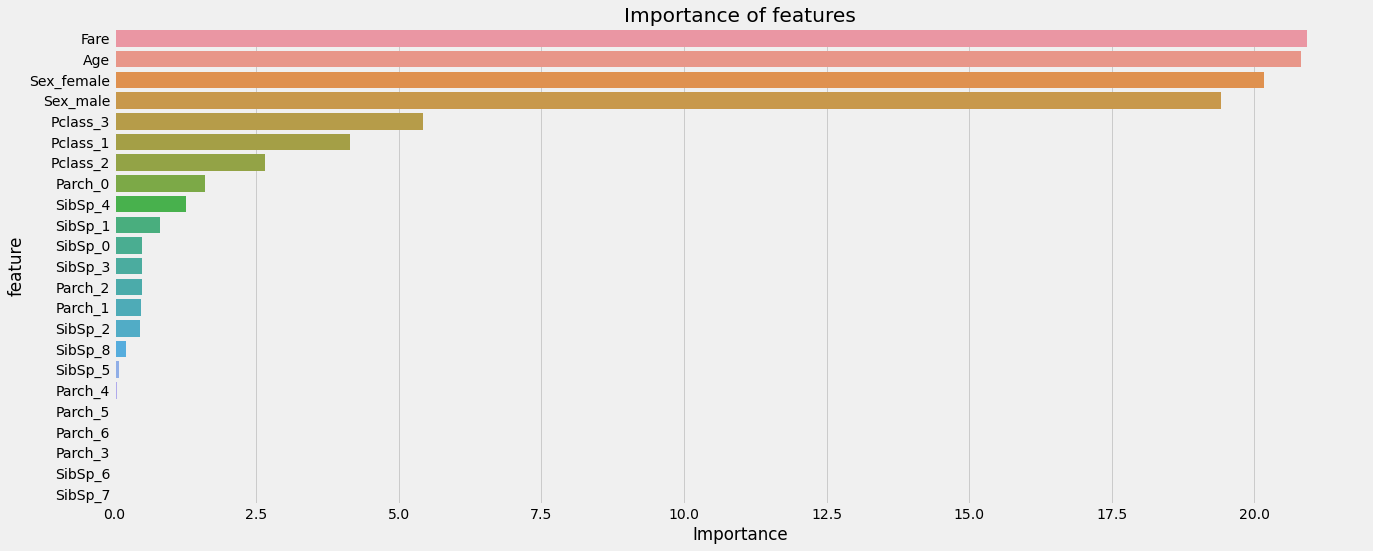

In [60]:
important_features_top = show_feature_importances(X_train.columns, model.feature_importances_, get_top=25)

### Кросс-валидация на всём объёме данных

In [55]:
Xx = X_train.copy()
Xx = Xx.append(X_valid, ignore_index=False)
Yy = y_train.copy()
Yy = Yy.append(y_valid, ignore_index=False) 
Xx.shape, Yy.shape

((1524, 23), (1524, 1))

In [56]:
cv=KFold(n_splits=5, random_state=42, shuffle=True)
cv_score = cross_val_score(model, Xx, Yy, scoring='f1_macro', cv=cv)
print(cv_score)

[0.83277969 0.88750759 0.86388227 0.87697457 0.83932347]


### Финальная модель

In [57]:
y_test_pred = model.predict(test)

### Сохранение результата

In [58]:
sumbit_df['Survived'] = y_test_pred
sumbit_df.to_csv('SergeyLazarevich_predictions.csv', index=False)